In [101]:
import numpy as np 
import pandas as pd 


import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report


In [157]:
wine=pd.read_csv('train.csv')

wine_test=pd.read_csv('test.csv')
#combined_df=pd.concat([wine,wine_test])

In [197]:
wine.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery', 'id'],
      dtype='object')

In [198]:
wine_test.columns

Index(['index', 'country', 'description', 'designation', 'points', 'price',
       'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery', 'id'],
      dtype='object')

## Data Cleaning

In [104]:
len(wine)

175000

In [105]:
wine_rdup =wine[wine.duplicated('description',keep=False)]

In [106]:
len(wine_rdup)

92017

In [107]:
wine_rn=wine_rdup.dropna(subset=['description', 'points','price'])

In [108]:
len(wine_rn)

92017

In [109]:
dp_df = wine_rdup[['description','points','price']]

In [110]:
dp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92017 entries, 0 to 174998
Data columns (total 3 columns):
description    92017 non-null object
points         92017 non-null float64
price          92017 non-null float64
dtypes: float64(2), object(1)
memory usage: 2.8+ MB


In [111]:
dp_df.head()

,description,points,price
0,This is a fine rich balanced wine. It has ripe...,88.870874,20.0
1,"A solid, chunky wine, with a structure that is...",88.041695,28.0
2,"This is powerful and concentrated, with the hi...",94.085021,130.0
3,"Rich, ripe and oaky, this Petite Sirah charms ...",89.869797,34.0
4,This wine is a unique in the state blend and f...,89.017651,24.0


In [112]:
def categories(points):
    if points < 84:
        return 1
    elif points >= 84 and points < 88:
        return 2 
    elif points >= 88 and points < 92:
        return 3 
    elif points >= 92 and points < 96:
        return 4 
    else:
        return 5

dp_df = dp_df.assign(points_category = dp_df['points'].apply(categories))
dp_df.head()

,description,points,price,points_category
0,This is a fine rich balanced wine. It has ripe...,88.870874,20.0,3
1,"A solid, chunky wine, with a structure that is...",88.041695,28.0,3
2,"This is powerful and concentrated, with the hi...",94.085021,130.0,4
3,"Rich, ripe and oaky, this Petite Sirah charms ...",89.869797,34.0,3
4,This wine is a unique in the state blend and f...,89.017651,24.0,3


In [113]:
#dp_df.groupby('points_category').count()

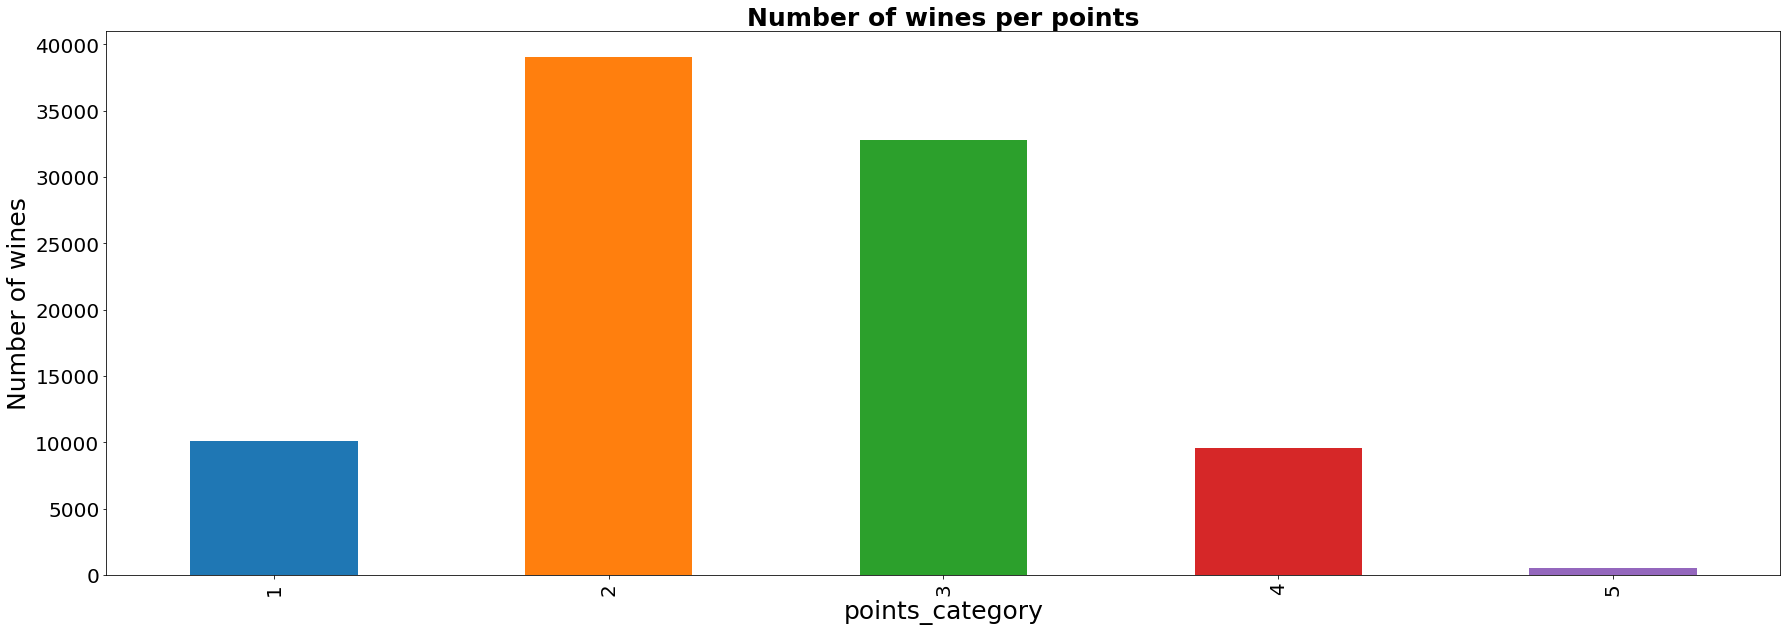

In [114]:
fig, ax = plt.subplots(figsize=(30,10))
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20) 
ax.set_title('Number of wines per points', fontweight="bold", size=25) 
ax.set_ylabel('Number of wines', fontsize = 25) 
ax.set_xlabel('Points', fontsize = 25)
dp_df.groupby(['points_category']).count()['description'].plot(ax=ax, kind='bar')

In [195]:
x = dp_df['description']
y = dp_df['price']

In [192]:
#x_cominbined=pd.concat([dp_df['description'],wine_test['description']])

In [199]:
vectorizer = CountVectorizer()
vectorizer.fit(x)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [200]:
x = vectorizer.transform(x)

In [179]:
len(dp_df)

92017

In [188]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
predictions = rfc.predict(x_test)

/usr/lib/python3/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [120]:
from sklearn import metrics

In [189]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.452618995870463
MSE: 78.30873723103673
RMSE: 8.8492224082705


In [191]:
len(predictions)

9202

In [133]:
x = wine_test['description']
len(x)

83210

In [134]:
vectorizer = CountVectorizer()
vectorizer.fit(x)
x = vectorizer.transform(x)

In [201]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc.predict(x)

/usr/lib/python3/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


KeyboardInterrupt: 